# 方差分析概述

## 单因素试验的方差分析

**方差分析**是根据试验的结果进行分析,鉴别各个有关因素对试验结果的影响程度.
>方差分析（ANOVA）是一种特殊形式的统计假设检定，广泛应用于实验数据的分析中。统计假设检定是一种根据数据进行决策的方法。测试结果（通过零假设进行计算）如果不仅仅是因为运气，则在统计学上称为显著。统计显著的结果（当可能性的p值小于临界的“显著值”）则可以推翻零假设。

## 单因素试验方差分析的数学模型


**假设**：
 1. 各组样本背后所隐含的族群分布必须为正态分布或者是逼近正态分布。
 2. 各组样本必须独立。
 3. 族群的方差必须相等。
 
 
 **平方和的分解：**
- 总平方和：
 $$ S_T = \sum_{j=1}^{s}\sum_{i=1}^{n_j}(X_{ij}-\bar{X})^2  \tag{1}$$
- 误差平方和：
  $$ S_E = \sum_{j=1}^{s}\sum_{i=1}^{n_j}(X_{ij}-\bar{X}_{\cdot j})^2  \tag{2}$$
- 效应平方和：
  $$ S_A = \sum_{j=1}^{s}\sum_{i=1}^{n_j}(\bar{X}_{\cdot j}-\bar{X})^2  \tag{3}$$
  
- 平方和公式：
$$ S_T = S_E + S_A \tag{4} $$



** 单因素试验方差分析表 **

| 方差来源 	| 平方和 	| 自由度 	|             均方            	|             F统计量             	|   P值   	|
|:--------:	|:------:	|:------:	|:---------------------------:	|:-------------------------------:	|:-------:	|
|   因素A  	|  $S_A$ 	|  $s-1$ 	| $\bar{S_A}=\frac{S_A}{s-1}$ 	| $F=\frac{\bar{S}_A}{\bar{S}_E}$ 	| $p$ value 	|
|   误差   	|  $S_E$ 	|  $n-s$ 	| $\bar{S_E}=\frac{S_E}{n-s}$ 	|                                 	|         	|
|   总和   	|  $S_T$ 	|  $n-1$ 	|                             	|                                 	|         	|

## 双因素无重复试验的方差分析
- 检验两个因素的交互效应,对两个因素的每一组合至少要做两次试验.
- 如果已知不存在交互作用,或已知交互作用对试验的指标影响很小,则可以不考虑交互作用.
- 对两个因素的每一组合只做一次试验,也可以对各因素的效应进行分析——双因素无重复试验的方差分析.


# python实现方差分析

## 单因素

In [3]:
import pandas as pd
data1 = pd.read_excel('./data/方差分析.xlsx', sheet='消费者', index_col=0, skiprows=(0,1))
data1.head()

,零售业,旅游业,航空公司,家电制造业
观测值,,,,
1,57,68.0,31.0,44.0
2,66,39.0,49.0,51.0
3,49,29.0,21.0,65.0
4,40,45.0,34.0,77.0
5,34,56.0,40.0,58.0


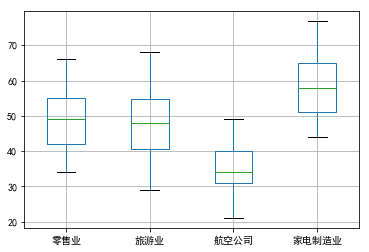

In [4]:
data1.boxplot()

In [8]:
import scipy.stats as sta
f1 = sta.f_oneway(data1['零售业'].dropna(),data1['旅游业'].dropna(),data1['航空公司'].dropna(),data1['家电制造业'].dropna())
print(f1)

F_onewayResult(statistic=3.4066426904716036, pvalue=0.038764524401221842)


## 双因素

In [11]:
data2 = pd.read_excel('./data/方差分析.xlsx',sheetname='电视')
data2.head()

,品牌,地区,销售额
0,1,1,365
1,2,1,345
2,3,1,358
3,4,1,288
4,1,2,350


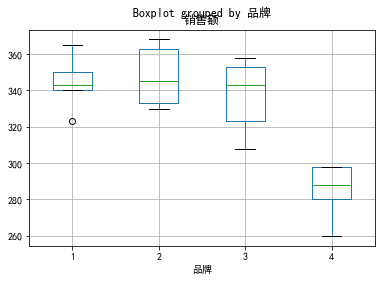

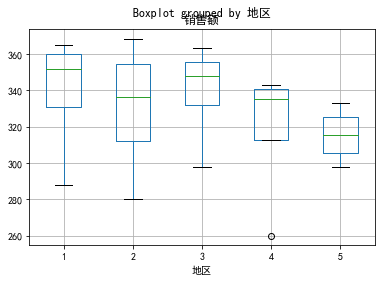

In [20]:
data2.boxplot(column='销售额',by='品牌')
data2.boxplot(column='销售额',by='地区');

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

ols = smf.ols('销售额 ~ C(地区) + C(品牌)',data=data2).fit()
f2 = sm.stats.anova_lm(ols)
print(f2)

            df    sum_sq      mean_sq          F    PR(>F)
C(地区)      4.0   2011.70   502.925000   2.100846  0.143665
C(品牌)      3.0  13004.55  4334.850000  18.107773  0.000095
Residual  12.0   2872.70   239.391667        NaN       NaN


C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
